<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time-data-in-pandas" data-toc-modified-id="Time-data-in-pandas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time data in pandas</a></span><ul class="toc-item"><li><span><a href="#Resampling" data-toc-modified-id="Resampling-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Resampling</a></span></li><li><span><a href="#Moving-Average" data-toc-modified-id="Moving-Average-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Moving Average</a></span></li><li><span><a href="#Trend" data-toc-modified-id="Trend-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Trend</a></span></li><li><span><a href="#Seasonality" data-toc-modified-id="Seasonality-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Seasonality</a></span></li><li><span><a href="#Cycles" data-toc-modified-id="Cycles-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Cycles</a></span></li></ul></li><li><span><a href="#Decomposing-a-time-series-with-statsmodels" data-toc-modified-id="Decomposing-a-time-series-with-statsmodels-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Decomposing a time series with statsmodels</a></span><ul class="toc-item"><li><span><a href="#Fitting-the-trend" data-toc-modified-id="Fitting-the-trend-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fitting the trend</a></span></li><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Quadratic-regression" data-toc-modified-id="Quadratic-regression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Quadratic regression</a></span></li><li><span><a href="#Exponential-regression" data-toc-modified-id="Exponential-regression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Exponential regression</a></span></li><li><span><a href="#Comparing-regressions" data-toc-modified-id="Comparing-regressions-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Comparing regressions</a></span></li></ul></li><li><span><a href="#Filtering-low-frequencies" data-toc-modified-id="Filtering-low-frequencies-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Filtering low frequencies</a></span><ul class="toc-item"><li><span><a href="#Adding-up-waves" data-toc-modified-id="Adding-up-waves-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Adding up waves</a></span></li><li><span><a href="#Fourier-transforms" data-toc-modified-id="Fourier-transforms-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fourier transforms</a></span></li></ul></li></ul></div>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

## Time data in pandas

In [2]:
### Pandas Datetime index
pd.date_range("24/11/2020", periods=20, freq="D")

DatetimeIndex(['2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13'],
              dtype='datetime64[ns]', freq='D')

In [3]:
lst = ["13/06/1975", "6/09/1975", "20/12/1975"]
pd.to_datetime(lst)

DatetimeIndex(['1975-06-13', '1975-06-09', '1975-12-20'], dtype='datetime64[ns]', freq=None)

In [7]:
date = "July 9th 1990"

In [8]:
pd.to_datetime(date)

Timestamp('1990-07-09 00:00:00')

In [9]:
#Get dates from range
pd.date_range("24/11/2020", "24/12/2020", freq="D")

DatetimeIndex(['2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03', '2020-12-04', '2020-12-05',
               '2020-12-06', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11', '2020-12-12', '2020-12-13',
               '2020-12-14', '2020-12-15', '2020-12-16', '2020-12-17',
               '2020-12-18', '2020-12-19', '2020-12-20', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24'],
              dtype='datetime64[ns]', freq='D')

In [10]:
#get hours from range
pd.date_range("24/11/2020", "25/11/2020", freq="H")

DatetimeIndex(['2020-11-24 00:00:00', '2020-11-24 01:00:00',
               '2020-11-24 02:00:00', '2020-11-24 03:00:00',
               '2020-11-24 04:00:00', '2020-11-24 05:00:00',
               '2020-11-24 06:00:00', '2020-11-24 07:00:00',
               '2020-11-24 08:00:00', '2020-11-24 09:00:00',
               '2020-11-24 10:00:00', '2020-11-24 11:00:00',
               '2020-11-24 12:00:00', '2020-11-24 13:00:00',
               '2020-11-24 14:00:00', '2020-11-24 15:00:00',
               '2020-11-24 16:00:00', '2020-11-24 17:00:00',
               '2020-11-24 18:00:00', '2020-11-24 19:00:00',
               '2020-11-24 20:00:00', '2020-11-24 21:00:00',
               '2020-11-24 22:00:00', '2020-11-24 23:00:00',
               '2020-11-25 00:00:00'],
              dtype='datetime64[ns]', freq='H')

In [11]:
df = pd.DataFrame()
df["date"] = pd.date_range("24/11/2020", "24/12/2020", freq="D")
df = df.set_index("date")

In [12]:
df

""
date
2020-11-24
2020-11-25
2020-11-26
2020-11-27
2020-11-28
2020-11-29
2020-11-30
2020-12-01
2020-12-02


In [13]:
df["values"] = np.random.randint(500, 3000, 31)

In [14]:
df.head(10)

,values
date,
2020-11-24,1605
2020-11-25,1747
2020-11-26,1620
2020-11-27,2195
2020-11-28,2032
2020-11-29,2447
2020-11-30,885
2020-12-01,904
2020-12-02,2867


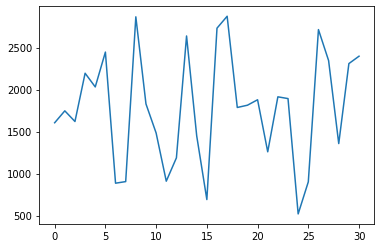

In [16]:
#Time series
plt.plot(df.values)

In [17]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', 
    parse_dates=['date'], index_col="date")

In [18]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


/Users/juanmarin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


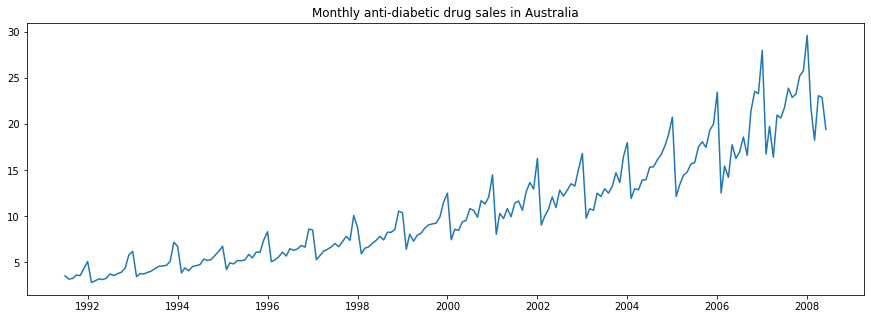

In [19]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.title("Monthly anti-diabetic drug sales in Australia");

### Resampling

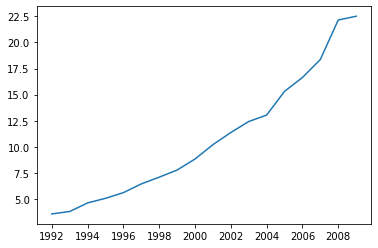

In [20]:
#Get anual values
plt.plot(df.resample(rule="A").mean())

### Moving Average

In [21]:
mean = df.value.mean()

In [22]:
mean

10.694429582156861

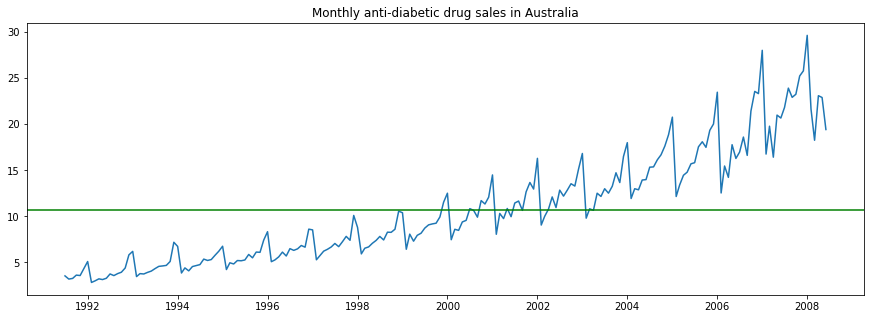

In [23]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.axhline(mean, c="g")
plt.title("Monthly anti-diabetic drug sales in Australia");

In [24]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [25]:
df.rolling(window=2).mean().head()

,value
date,
1991-07-01,NaN
1991-08-01,3.353741
1991-09-01,3.216556
1991-10-01,3.431612
1991-11-01,3.588436


In [27]:
df.rolling(window=4).mean().head(10)

,value
date,
1991-07-01,NaN
1991-08-01,NaN
1991-09-01,NaN
1991-10-01,3.392677
1991-11-01,3.402496
1991-12-01,3.683866
1992-01-01,4.142895
1992-02-01,3.943774
1992-03-01,3.798759


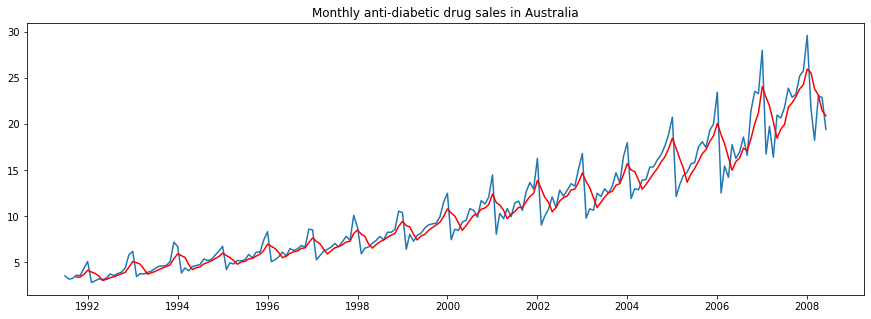

In [33]:
#suaviza la serie
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(df.rolling(window=4).mean(), c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

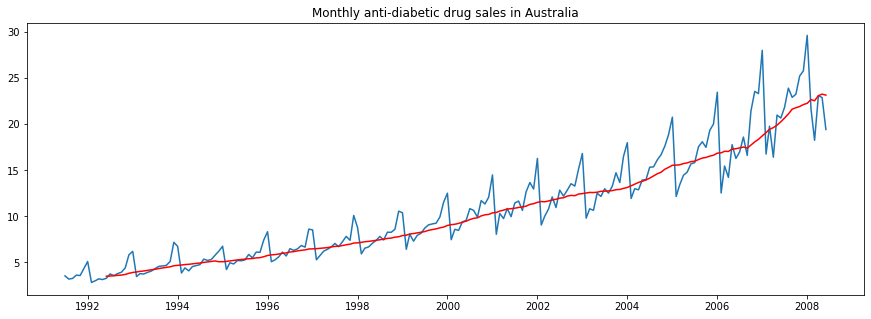

In [35]:
#use months for window
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(df.rolling(window=12).mean(), c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

### Trend
    How the average changes through time

### Seasonality
    Repetitive pattern of peaks and droughts with a regular interval
    Usually relates to an interval of the calendar

![](https://assets.datacamp.com/production/repositories/684/datasets/9013c4b95cae33e4c24cfab6f3e9760f26e40351/ch1_vid2_aus_brick.png)

### Cycles
    Patterns repeated in uneven intervals or that do not relate to a period of the calendar.
    In general, they have a longer interval thgan seasons, and a larger amplitude of variation.

## Decomposing a time series with statsmodels

In [36]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
res = seasonal_decompose(df.value, model="additive")

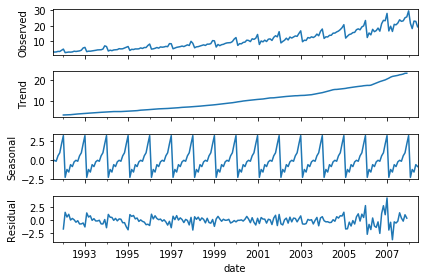

In [39]:
res.plot();

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(res.seasonal, c="g")
plt.plot(res.trend, c='r')
plt.title("Monthly anti-diabetic drug sales in Australia");

The model is called additive because:

In [ ]:
plt.plot(res.seasonal + res.trend)

In [ ]:
plt.plot(res.seasonal + res.resid + res.trend)

What type of trend do we have?

### Fitting the trend

In [41]:
# Linear regression
from sklearn.linear_model import LinearRegression

In [42]:
df.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [43]:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [44]:
df.shape

(204, 1)

In [45]:
df.index[1] - df.index[0]

Timedelta('31 days 00:00:00')

In [46]:
df["day"] = (df.index-df.index[0]).days

In [47]:
df.head()

,value,day
date,,
1991-07-01,3.526591,0
1991-08-01,3.180891,31
1991-09-01,3.252221,62
1991-10-01,3.611003,92
1991-11-01,3.565869,123


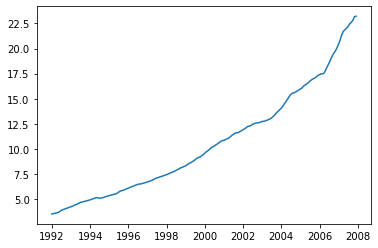

In [48]:
plt.plot(res.trend)

### Linear regression

$$value = m * day + n$$

In [49]:
lr = LinearRegression()
lr.fit(
    df[["day"]], 
    df.value
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lr.predict(df[["day"]])[:10]

array([1.22047005, 1.31550237, 1.4105347 , 1.50250146, 1.59753379,
       1.68950056, 1.78453288, 1.87956521, 1.96846642, 2.06349875])

In [51]:
df["pred_linear"] = lr.predict(df[["day"]])

In [52]:
df.head()

,value,day,pred_linear
date,,,
1991-07-01,3.526591,0,1.220470
1991-08-01,3.180891,31,1.315502
1991-09-01,3.252221,62,1.410535
1991-10-01,3.611003,92,1.502501
1991-11-01,3.565869,123,1.597534


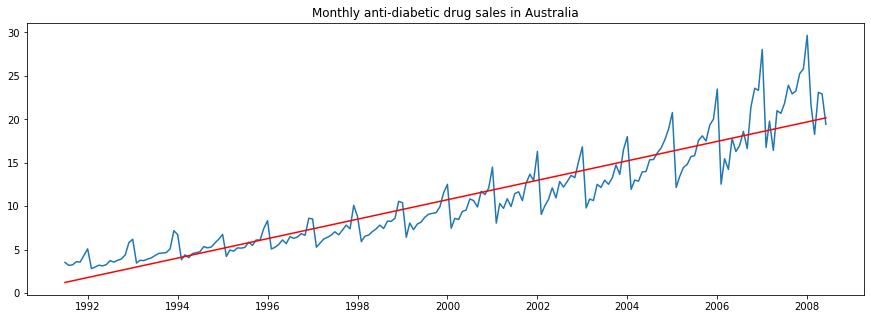

In [53]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(df.pred_linear ,c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

### Quadratic regression

$$value = m * day^2 + n$$

In [54]:
df["day_squared"] = df.day ** 2

In [55]:
lr2 = LinearRegression()
lr2.fit(
    df[["day_squared"]], 
    df.value
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lr2.predict(df[["day_squared"]])[:10]

array([4.41285925, 4.41333221, 4.41475107, 4.41702479, 4.42030495,
       4.42437992, 4.42952139, 4.43560875, 4.44215972, 4.45007788])

In [57]:
df["pred_quadratic"] = lr2.predict(df[["day_squared"]])

In [58]:
df.head()

,value,day,pred_linear,day_squared,pred_quadratic
date,,,,,
1991-07-01,3.526591,0,1.220470,0,4.412859
1991-08-01,3.180891,31,1.315502,961,4.413332
1991-09-01,3.252221,62,1.410535,3844,4.414751
1991-10-01,3.611003,92,1.502501,8464,4.417025
1991-11-01,3.565869,123,1.597534,15129,4.420305


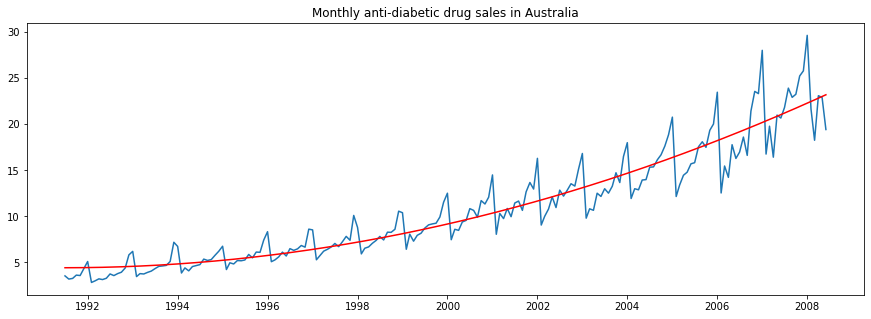

In [59]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(df.pred_quadratic ,c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

### Exponential regression

$$value = k * e^{a * day}$$

$$log(value) = log(k * e^{a * day}) = log(k) + a * day$$

In [60]:
import numpy as np

In [61]:
df["log_value"] = np.log(df.value)

In [62]:
df.head()

,value,day,pred_linear,day_squared,pred_quadratic,log_value
date,,,,,,
1991-07-01,3.526591,0,1.220470,0,4.412859,1.260332
1991-08-01,3.180891,31,1.315502,961,4.413332,1.157161
1991-09-01,3.252221,62,1.410535,3844,4.414751,1.179338
1991-10-01,3.611003,92,1.502501,8464,4.417025,1.283986
1991-11-01,3.565869,123,1.597534,15129,4.420305,1.271408


In [63]:
lr3 = LinearRegression()
lr3.fit(
    df[["day"]], 
    df.log_value
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
lr3.predict(df[["day"]])[:10]

array([1.26668176, 1.27617542, 1.28566908, 1.29485648, 1.30435014,
       1.31353755, 1.3230312 , 1.33252486, 1.34140602, 1.35089967])

In [65]:
df["pred_exp"] = np.exp(lr3.predict(df[["day"]]))

In [66]:
df.head()

,value,day,pred_linear,day_squared,pred_quadratic,log_value,pred_exp
date,,,,,,,
1991-07-01,3.526591,0,1.220470,0,4.412859,1.260332,3.549056
1991-08-01,3.180891,31,1.315502,961,4.413332,1.157161,3.582910
1991-09-01,3.252221,62,1.410535,3844,4.414751,1.179338,3.617087
1991-10-01,3.611003,92,1.502501,8464,4.417025,1.283986,3.650472
1991-11-01,3.565869,123,1.597534,15129,4.420305,1.271408,3.685293


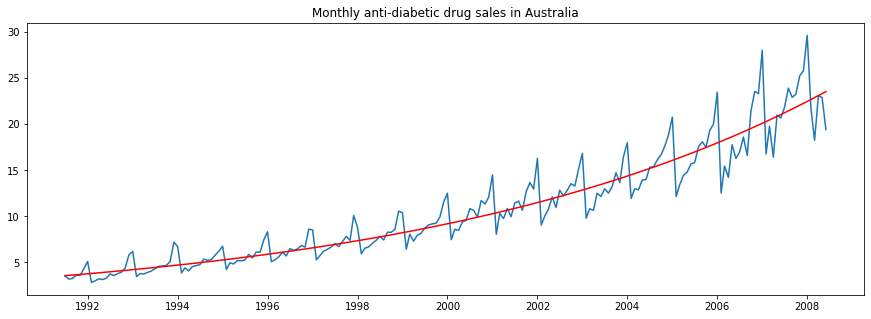

In [67]:
plt.figure(figsize=(15,5))
plt.plot(df.value)
plt.plot(df.pred_exp ,c="r")
plt.title("Monthly anti-diabetic drug sales in Australia");

### Comparing regressions

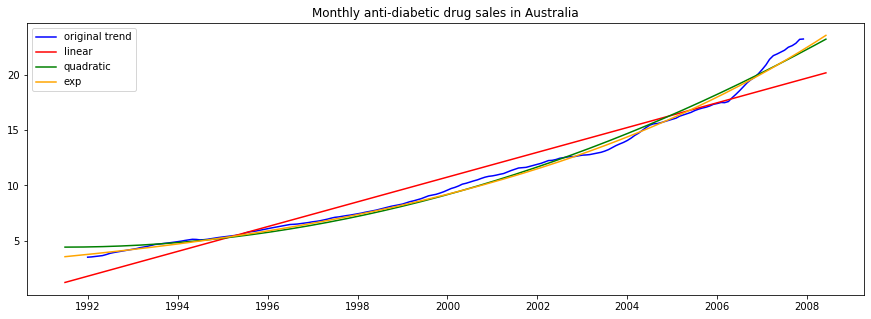

In [70]:
plt.figure(figsize=(15,5))
plt.plot(res.trend,c="b", label="original trend")
plt.plot(df.pred_linear ,c="r", label="linear")
plt.plot(df.pred_quadratic ,c="g", label="quadratic")
plt.plot(df.pred_exp ,c="orange", label="exp")

plt.title("Monthly anti-diabetic drug sales in Australia");

plt.legend()

In [71]:
((df.pred_linear - df.value) ** 2).mean()

5.1198824621362355

In [72]:
((df.pred_quadratic - df.value) ** 2).mean()

3.584623958650075

In [73]:
((df.pred_exp - df.value) ** 2).mean()

3.4806737592042167

Exponential fit wins!!

## Filtering low frequencies

### Adding up waves

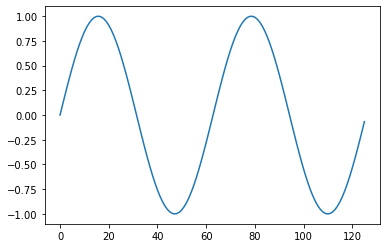

In [74]:
x = np.arange(0, 4*np.pi, .1)
plt.plot(np.sin(x))

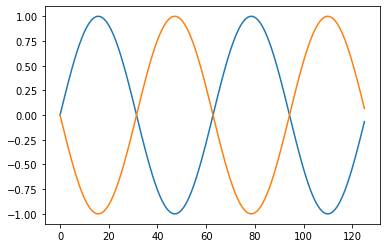

In [76]:
plt.plot(np.sin(x))
plt.plot(-np.sin(x))

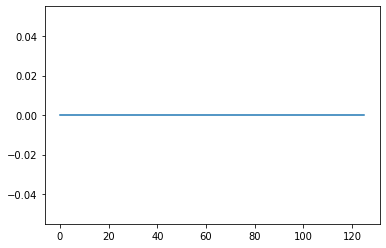

In [77]:
plt.plot(np.sin(x) - np.sin(x))

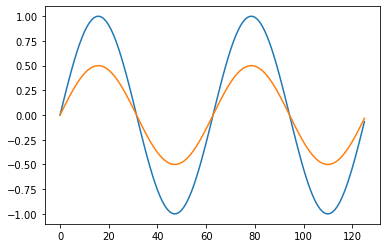

In [78]:
plt.plot(np.sin(x))
plt.plot(0.5 * np.sin(x))

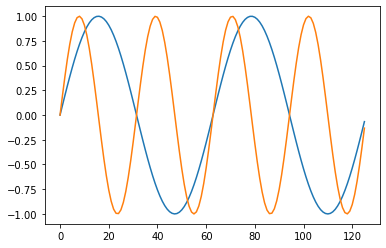

In [79]:
plt.plot(np.sin(x))
plt.plot(np.sin(2 * x))

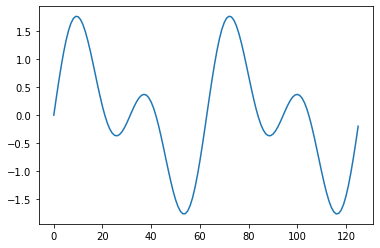

In [80]:
plt.plot(np.sin(x) + np.sin(2 * x))

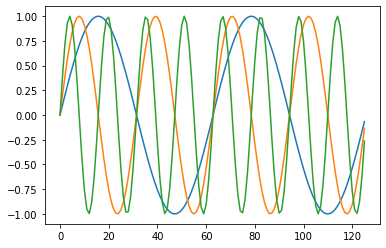

In [81]:
plt.plot(np.sin(x))
plt.plot(np.sin(2 * x))
plt.plot(np.sin(4 * x))

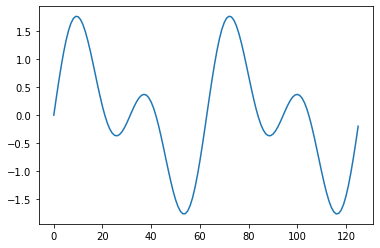

In [82]:
plt.plot(np.sin(x) + np.sin(2 * x))

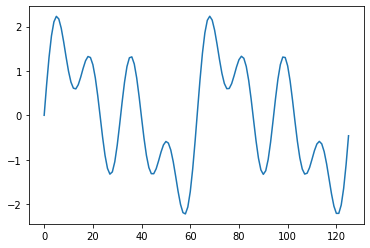

In [83]:
plt.plot(np.sin(x) + np.sin(2 * x) + np.sin(4 * x))

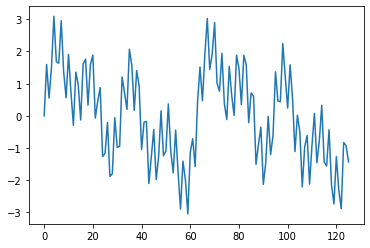

In [84]:
plt.plot(np.sin(x) + np.sin(2 * x) + np.sin(4 * x) + np.sin(20 * x))

### Fourier transforms

In [96]:
!pip install scipy.ftt

ERROR: Could not find a version that satisfies the requirement scipy.ftt (from versions: none)
ERROR: No matching distribution found for scipy.ftt


In [95]:
from scipy.fft import fft, fftfreq, fftshift

ModuleNotFoundError: No module named 'scipy.fft'

In [ ]:
ft = fft(np.sin(x))

In [ ]:
sp = fftshift(ft)

In [ ]:
freq = fftshift(fftfreq(len(x)))

In [ ]:
df = pd.DataFrame({"freq": freq, "value": sp.real})
df = df[df.value>0]
df

In [ ]:
plt.stem(df.freq,df.value)
plt.axvline(0,c="k")

In [ ]:
x = np.sin(x) + np.sin(4 * x)

In [ ]:
ft = fft(x)
sp = fftshift(ft)
freq = fftshift(fftfreq(len(a)))
df = pd.DataFrame({"freq":freq,"value":sp.real})
df = df[df.value>0]
df

In [ ]:
plt.stem(df.freq,df.value)
plt.axvline(0,c="k")

In [ ]:
plt.plot(res.seasonal)

In [ ]:
ft = fft(res.seasonal.values)
sp = fftshift(ft)
freq = fftshift(fftfreq(len(res.seasonal.values)))
df = pd.DataFrame({"freq":freq,"value":sp.real})
df = df[df.value>0]
df

In [ ]:
plt.stem(df.freq,df.value)
plt.axvline(0,c="k")

In [ ]:
def fourier(x):
    ft = fft(x)
    sp = fftshift(ft)
    freq = fftshift(fftfreq(len(x)))
    df = pd.DataFrame({"freq":freq,"value":sp.real})
    df = df[df.value>0.5]
    return df

In [ ]:
x = np.linspace(0,4*np.pi,1000)
sig = np.zeros(x.shape)
for f in [1, 3, 5, 7, 40]:
    sig += np.sin(x*f)

In [ ]:
plt.plot(sig)

In [ ]:
ft = fourier(sig)

In [ ]:
plt.stem(ft["freq"], ft["value"])